# Ex - GroupBy

### Step 1. Importamos librerías

In [1]:
import pandas as pd

### Step 2. Importar el conjunto de datos de esta [dirección](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv). 

In [2]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv"
drinks = pd.read_csv(url)

### Step 3.  Asignarlo a una variable llamada drinks.

In [3]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [4]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


### Step 4. ¿Qué continente bebe más cerveza de media?

In [9]:
beers_continent = drinks.groupby("continent")["beer_servings"].mean()
idx_max_beer = beers_continent.argmax()
beers_continent.iloc[[idx_max_beer]]

continent
EU    193.777778
Name: beer_servings, dtype: float64

In [16]:
beers_continent.sort_values(ascending=False).iloc[:1]

continent
EU    193.777778
Name: beer_servings, dtype: float64

### Step 5. Para cada continente saca las estadísticas de consumo de vino.

<AxesSubplot: xlabel='continent'>

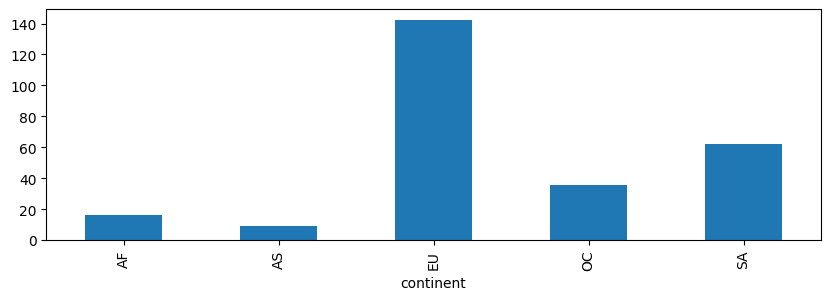

In [21]:
stats_wine = drinks.groupby("continent")["wine_servings"].describe()
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(10, 3))
stats_wine["mean"].plot(kind="bar")

### Step 6. Imprimir la media de consumo de alcohol por continente para cada columna

In [23]:
drinks.groupby("continent")[["beer_servings", "spirit_servings", "wine_servings", "total_litres_of_pure_alcohol"]]\
      .mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


### Step 7. Imprimir la mediana del consumo de alcohol por continente para cada columna

In [24]:
drinks.groupby("continent")[["beer_servings", "spirit_servings", "wine_servings", "total_litres_of_pure_alcohol"]]\
      .median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


### Step 8. Imprime los valores medios, mínimos y máximos del consumo de alcohol por continente.

In [25]:
drinks.groupby("continent")[["beer_servings", "spirit_servings", "wine_servings", "total_litres_of_pure_alcohol"]]\
      .aggregate(["mean", "min", "max"])

beer_servings          spirit_servings          wine_servings      \
                   mean min  max            mean min  max          mean min   
continent                                                                     
AF            61.471698   0  376       16.339623   0  152     16.264151   0   
AS            37.045455   0  247       60.840909   0  326      9.068182   0   
EU           193.777778   0  361      132.555556   0  373    142.222222   0   
OC            89.687500   0  306       58.437500   0  254     35.625000   0   
SA           175.083333  93  333      114.750000  25  302     62.416667   1   

               total_litres_of_pure_alcohol             
           max                         mean  min   max  
continent                                               
AF         233                     3.007547  0.0   9.1  
AS         123                     2.170455  0.0  11.5  
EU         370                     8.617778  0.0  14.4  
OC         212                     3.381250  0.0  10.4  
SA         221                     6.308333  3.8   8.3